# Model Training Sensitivity Tests

In [1]:
import os
import DataProcess
import MLP_Model
#Set working directories
cwd = os.getcwd()
os.chdir("..")
os.chdir("..")
datapath = os.getcwd()  

2023-10-25 23:08:16.881693: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-10-25 23:08:16.881723: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
#Define hold out year
HOY = 2019
#Run data processing script to partition key regional dataframes
#note, need to load RegionTrain_SCA.h5,
RegionTrain, RegionTest, RegionObs_Train, RegionObs_Test, RegionTest_notScaled = DataProcess.DataProcess(HOY, datapath, cwd)

Processing training dataframes for each region
N_Sierras
S_Sierras_Low
S_Sierras_High


In [3]:
#list(RegionTest['N_Sierras'][RegionTest['N_Sierras']['hasSnow'] == False].columns)

In [4]:
#RegionTrain['N_Sierras']

**Ideas:**

We can look at the "shuffle" option in MLP_Model.py (T/F)

the number of epochs hereTwo different options for training. Can add "batch_size" variable to Model_train function and test model performance here. Also change size of LDs, number of layers. (training > SSM_Hindcast > Hindcast_eval)

Physics Informed Neural Networks (PINNS)

loss='mse' could use a function instead of just a metric

activation methods in each layer

In [5]:
#model training, each participants model will be different but should follow the prescribed input feature template
epochs= 30
batch_size = 100
node_list =  [128, 128, 64, 64, 32, 16]  # originally we used [128, 128, 64, 64, 32, 16] e.g. [2**7, 2**7, 2**6, 2**6, 2**5, 2**4]
shuffle = True
MLP_Model.Model_train(cwd, epochs, batch_size, RegionTrain, RegionTest, RegionObs_Train, RegionObs_Test, node_list, shuffle)

Training model for:  N_Sierras
All previous files deleted successfully.
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 105)]             0         
                                                                 
 dense (Dense)               (None, 128)               13568     
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                       

2023-10-25 23:08:22.530338: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-10-25 23:08:22.530367: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2023-10-25 23:08:22.530384: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (jupyter-spestana): /proc/driver/nvidia/version does not exist
2023-10-25 23:08:22.530562: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Training model for:  S_Sierras_Low
All previous files deleted successfully.
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 6)]               0         
                                                                 
 dense_7 (Dense)             (None, 128)               896       
                                                                 
 dense_8 (Dense)             (None, 128)               16512     
                                                                 
 dense_9 (Dense)             (None, 64)                8256      
                                                                 
 dense_10 (Dense)            (None, 64)                4160      
                                                                 
 dense_11 (Dense)            (None, 32)                2080      
                                                 

In [6]:
#Need to create Predictions folder if running for the first time
Predictions = MLP_Model.Model_predict(cwd,  RegionTest, RegionObs_Test, RegionTest_notScaled)

18/18 [==============================] - 0s 774us/step


Preliminary Model Analysis for:  N_Sierras
 R2 is  0.8452157506721958
 RMSE is  14.331523460182222
 R2 fSCA is  0.833444857719719
 RMSE fSCA is  14.866474805817203


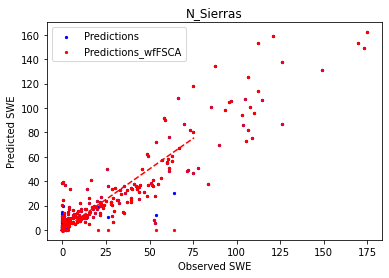

Preliminary Model Analysis for:  S_Sierras_Low
 R2 is  0.9792950135893126
 RMSE is  3.6307896774063977
 R2 fSCA is  0.869219559105562
 RMSE fSCA is  9.125045018286787


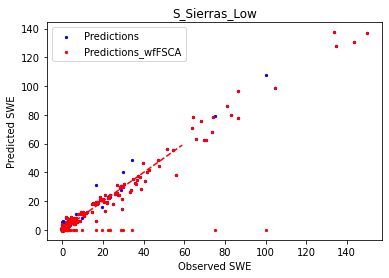

Preliminary Model Analysis for:  S_Sierras_High
 R2 is  0.9725029817718335
 RMSE is  7.778754919699207
 R2 fSCA is  0.9611674736428669
 RMSE fSCA is  9.244110128018926


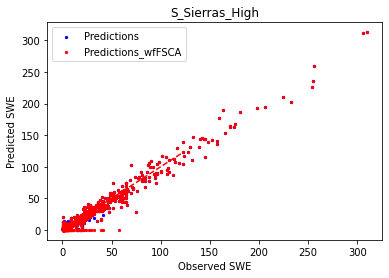

In [7]:
Performance = MLP_Model.Prelim_Eval(cwd, Predictions, True)

Performance['nLayers'] = [len(node_list)] * len(Performance)
Performance['node_list'] = [node_list] * len(Performance)
Performance['epochs'] = [epochs] * len(Performance)
Performance['batch_size'] = [batch_size] * len(Performance)
Performance['shuffle'] = [shuffle] * len(Performance)

In [8]:
Performance

,Region,R2,RMSE,R2_fSCA,RMSE_fSCA,nLayers,node_list,epochs,batch_size,shuffle
0,N_Sierras,0.85,14.33,0.83,14.87,6,"[128, 128, 64, 64, 32, 16]",30,100,True
1,S_Sierras_Low,0.98,3.63,0.87,9.13,6,"[128, 128, 64, 64, 32, 16]",30,100,True
2,S_Sierras_High,0.97,7.78,0.96,9.24,6,"[128, 128, 64, 64, 32, 16]",30,100,True


In [8]:

Performance

,Region,R2,RMSE,R2_fSCA,RMSE_fSCA,nLayers,node_list,epochs,batch_size,shuffle
0,N_Sierras,0.89,12.24,0.88,12.86,6,"[128, 128, 64, 64, 32, 16]",30,100,True
1,S_Sierras_Low,0.98,3.84,0.87,9.21,6,"[128, 128, 64, 64, 32, 16]",30,100,True
2,S_Sierras_High,0.98,7.25,0.96,8.81,6,"[128, 128, 64, 64, 32, 16]",30,100,True
